# Modelos de clasificación

**Autor/es:**
+ Aldo Arroyo
+ Benjamín Sepúlveda

**Correos Electrónicos:**
+ be.sepulvedat@duocuc.cl
+ ald.arroyo@duocuc.cl

**Fecha de Creación:** 12 deNoviembre de 2024  
**Versión:** 1.0

---

## Descripción

Este notebook contiene el desarrollo de la evaluación de modelos de regresión de la asignatura de Fundamentos de Machine Learning de la carrera de Ingeniería en informática de DuocUC - Sede Concepción


# Contexto del negocio



Counter-Strike: Global Offensive (CS: GO) es un videojuego de disparos en primera persona extremadamente popular en la escena de los videojuegos competitivos y los eSports. Se juegan partidas entre dos equipos de 5 jugadores: el equipo de terroristas y el equipo de contra-terroristas. El objetivo principal varía según el rol de los equipos:

Los terroristas deben plantar una bomba en uno de los sitios designados dentro del mapa y defenderla hasta que explote.
Los contra-terroristas deben evitar que la bomba sea plantada o, si es colocada, desactivarla antes de que explote. Una partida se desarrolla a lo largo de varias rondas, y los equipos pueden ganar una ronda eliminando al equipo contrario o cumpliendo su objetivo (plantar o desactivar la bomba). Los resultados de estas rondas definen el resultado final de la partida.
Naturaleza del problema: En un entorno altamente competitivo como CS: GO, hay muchos factores que pueden influir en el desempeño y en la probabilidad de victoria de un equipo o jugador. Estos factores incluyen las habilidades individuales, las estrategias del equipo, el valor del equipamiento, las acciones específicas tomadas en cada ronda, entre otros.

Los datos disponibles para este análisis han sido extraídos de más de 7000 partidas y contienen información detallada sobre los jugadores y sus acciones en el juego.



# Objetivo

El propósito de este estudio es desarrollar y evaluar modelos de clasificación que permitan predecir con precisión si un jugador puede o no sobrevivir, basándose en diversas variables relacionadas con su desempeño en el juego, como el número de eliminaciones, el valor del equipo al inicio de la ronda, el tiempo de vida durante la partida, entre otros. La variable objetivo utilizada es "Survived", que indica si el jugador logró sobrevivir o no durante la ronda. A través de este análisis, buscamos identificar los factores clave que influyen en la supervivencia de los jugadores y, a partir de allí, construir modelos predictivos que puedan generalizar y ofrecer recomendaciones útiles para la toma de decisiones en situaciones similares.

# Preparación del entorno

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pickle


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator

from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_recall_curve, auc

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, mean_squared_error

from sklearn.pipeline import Pipeline
from operator import itemgetter
from sklearn.metrics import accuracy_score

In [2]:
!wget https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv

--2024-11-20 12:20:04--  https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6028:18::a27d:4712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds [following]
--2024-11-20 12:20:05--  https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uceecc6291619054bb5ae8d489a5.dl.dropboxusercontent.com/cd/0/inline/Cescm5Ahlyv9LlvCHQJ558FAAR1JBaGYPNCTsznEYwMqqudFw_y6rIblP3a80cfjg3ZcTVrjf5Fe5XDXLNsYhAow7hfErC7qlFQoZIsawRQcLw6EZ0czmk0HBta1ODs0xxK_xrusOcwfO9n4sAGBmopZ/file# [following]
--2024-11-20 12:20:05--  https://uceecc6291619054bb5ae8d489a5.dl.dropbo

In [3]:
data = pd.read_csv("demo_round_traces.csv", sep=";")

In [4]:
data.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176


## Funciones utiles

In [5]:
def ver_matriz(matriz_x: np.array, target_names: np.array, ax, title="Matriz de confusión") -> None:
    """Visualiza una matriz de confusión en un subplot dado por ax."""
    clases = target_names
    group_counts = ["{0:0.0f}".format(value) for value in matriz_x.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz_x.flatten() / matriz_x.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(target_names), len(target_names))

    sns.heatmap(matriz_x, annot=labels, fmt='', cmap='Blues',
                xticklabels=clases, yticklabels=clases, ax=ax)

    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.set_xlabel("PREDICCIÓN", fontsize=10)
    ax.set_ylabel("REAL", fontsize=10)

In [6]:
def metrics_by_matrix(matriz: np.ndarray):
    """ Retorna las métricas de clasificación desde la matriz de confusión """
    tn, fp, fn, tp = matriz.ravel()
    accuracy_manual = (tn + tp) / (tn + fp + fn + tp)
    precision_manual = tp / (tp + fp)
    recall_manual = tp / (tp + fn)
    f1_score_manual = 2 * (precision_manual * recall_manual / (precision_manual + recall_manual))
    return accuracy_manual, precision_manual, recall_manual, f1_score_manual

def get_auc(real, prediccion):
    """ Retorna AUC, TPR y FPR """
    fpr, tpr, thresholds = roc_curve(real, prediccion)
    return auc(fpr, tpr), tpr, fpr, thresholds

def false_positive_rate(cm):
    """Recibe una matriz de confusión y retorna la métrica de False Positive Rate"""
    tn, fp, fn, tp = cm.ravel()
    return fp / (fp + tn)

In [7]:
target_names = ["no sobrevivio","sobrevivio"]

In [8]:
def generacion_modelos(models : dict, target_names : str,
                       X_train : pd.DataFrame, X_test : pd.DataFrame,
                       y_train : pd.Series, y_test : pd.Series):
  matrices = {}
  history = {}
  history_roc = {}
  history_report = {}
  for name, model in models.items():
    pipeline = Pipeline(steps=[('model', model)])
    pipeline.fit(X_train, y_train)
    # Guardar el modelo entrenado en el diccionario
    y_pred = pipeline.predict(X_test)
    # Guarda matriz para poder visualizar después
    matrices[name] = confusion_matrix(y_test, y_pred)
    # Guarda el accuracy
    history[name] = accuracy_score(y_test, y_pred)
    # Guarda el roc_auc
    history_roc[name] = roc_auc_score(y_test, y_pred)
    history_report[name] = classification_report(y_test, y_pred, target_names=target_names)
  return matrices, history, history_roc, history_report

# Fase 2 - Comprensión de los datos

## Distribución de la variable objetivo

<ipython-input-9-3c8c2d6d18f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Survived', data=data, palette='viridis')  # Cambia 'Survived' por el nombre de tu variable


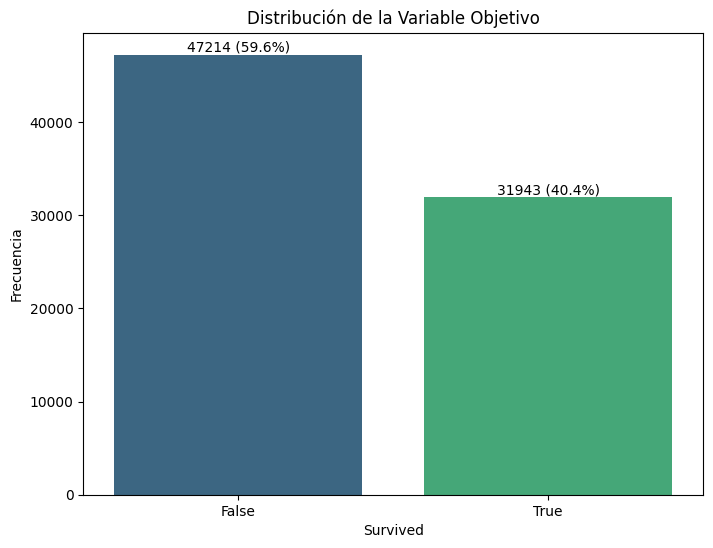

In [9]:
# Calcular la distribución de la variable objetivo
total = len(data)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Survived', data=data, palette='viridis')  # Cambia 'Survived' por el nombre de tu variable
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Survived')
plt.ylabel('Frecuencia')

# Añadir las cantidades y los porcentajes sobre cada barra
for p in ax.patches:
    count = int(p.get_height())  # Obtener la altura (frecuencia) de cada barra
    percentage = 100 * count / total  # Calcular el porcentaje
    ax.annotate(f'{count} ({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')  # Posición y formato del texto

plt.show()

La distribucion de la variable objetivo muestra un desbalanceo de clases, con mas datos perteneciendo a la categoria False (47214) que a la categoria True (31943). Esto sugiere que, la mayoria de los datos corresponden a eventos donde el jugador no logró sobrevivir debido a la propia naturaleza del juego.

## Correlación entre la variable objetivo y el resto

Aquí se calcula la correlación de las variables del data set con nuestra variable objetivo, para así poder determinar las variables más idóneas para nuestros modelos.

In [10]:
# Calcular la correlación entre todas las variables y Survived

columnas = ['InternalTeamId', 'MatchId', 'RoundId',
       'SteamId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch',
       'TimeAlive', 'ScaledTimeAlive', 'AvgCentroidDistance',
       'TravelledDistance', 'AvgRoundVelocity', 'AvgKillDistance',
       'AvgSiteDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
       'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'AvgMatchKillDist']

data_select = data[columnas]

# Calcula la matriz de correlación
correlation_matrix = data_select.corr()

# Selecciona la correlación con Survived
round_eq_value_correlations = correlation_matrix["Survived"]

# Convertir la correlación en un DataFrame para poder manipular el formato
correlations_df = round_eq_value_correlations.reset_index()
correlations_df.columns = ['Variable', 'Correlación']

# Mostrar el resultado en 2 columnas
print(correlations_df.to_string(index=False, col_space=20, justify='justify'))

                   Variable          Correlación
             InternalTeamId             0.044872
                    MatchId            -0.003239
                    RoundId            -0.015361
                    SteamId            -0.017533
                RoundWinner            -0.359380
                MatchWinner            -0.143498
                   Survived             1.000000
              AbnormalMatch                  NaN
                  TimeAlive             0.224926
            ScaledTimeAlive             0.658926
        AvgCentroidDistance             0.140934
          TravelledDistance             0.051916
           AvgRoundVelocity             0.012378
            AvgKillDistance             0.190699
            AvgSiteDistance            -0.084985
      RLethalGrenadesThrown             0.171732
   RNonLethalGrenadesThrown             0.125064
        PrimaryAssaultRifle             0.110008
         PrimarySniperRifle             0.067100
               Prima

### Variables con mejor correlación

El siguiente bloque selecciona la mejor correlación de las variables del data set, tanto positivas como negativas.

In [11]:
round_correlations = correlation_matrix["Survived"]

sorted_correlations = round_correlations.sort_values(ascending=False)

# Obtener las 8 mayores correlaciones positivas (excluyendo la autocorrelación de Survived consigo mismo)
top_8_positive = sorted_correlations[1:9]

# Obtener las 8 mayores correlaciones negativas
top_8_negative = sorted_correlations[-8:]

# Mostrar resultados
# Mostrar resultados
print("Top 8 correlaciones positivas:")
print(top_8_positive)

print("\nTop 8 correlaciones negativas:")
print(top_8_negative)

Top 8 correlaciones positivas:
ScaledTimeAlive                0.658926
RoundKills                     0.331619
TimeAlive                      0.224926
RoundHeadshots                 0.205279
AvgKillDistance                0.190699
TeamStartingEquipmentValue     0.173237
RLethalGrenadesThrown          0.171732
RoundStartingEquipmentValue    0.170578
Name: Survived, dtype: float64

Top 8 correlaciones negativas:
RoundId           -0.015361
SteamId           -0.017533
RoundAssists      -0.063264
AvgSiteDistance   -0.084985
MatchWinner       -0.143498
PrimaryPistol     -0.173705
RoundWinner       -0.359380
AbnormalMatch           NaN
Name: Survived, dtype: float64


## Selección de variables

Despues de analizar las variables y su correlacion, se decidió utilizar las siguientes:

1. RoundKills (correlación: 0.331619):
- Esta variable es relevante porque los jugadores que logran más eliminaciones en una ronda tienen una mayor probabilidad de sobrevivir, ya que se reducen las amenazas y aumentan sus probabilidades de ganar la ronda.

2. RoundStartingEquipmentValue (correlación: 0.170578):
- La correlación positiva sugiere que un mayor valor de equipo al inicio de la ronda está asociado con mayores probabilidades de supervivencia, lo que destaca la importancia de la estrategia de equipamiento, donde invertir en un buen equipo puede ser crucial para afrontar los retos de la ronda y mejorar las oportunidades de éxito.

3. ScaledTimeAlive (correlación: 0.658926):
- Esta variable presenta la correlación positiva más alta con la variable objetivo. Esto sugiere que la duración en el juego es un factor crucial para la supervivencia. Más específicamente, considerando el significado de la variable, esta indicaría qué tan cerca estuvo el jugador de permanecer con vida hasta el final de la ronda en comparación con los demás, ya que la variable está relacionada con el tiempo de vida del jugador que más duró en la ronda.

4. AvgKillDistance (correlación: 0.190699):
- Esta variable sugiere que los jugadores que eliminan a sus oponentes a mayores distancias tienen más probabilidades de sobrevivir. Esto podría indicar que utilizan armas de largo alcance o adoptan tácticas más conservadoras, evitando el combate cercano y favoreciendo una estrategia de mayor seguridad y control de distancia.

5. RLethalGrenadesThrown (correlación: 0.171732):
- Esta variable indica que los jugadores que lanzan más granadas letales durante la ronda tienden a tener una mayor probabilidad de sobrevivir. Las granadas letales a menudo se utilizan para limpiar o controlar áreas específicas del mapa, lo cual podría ayudar a los jugadores a evitar situaciones de alto riesgo, manteniéndose más seguros y, por lo tanto, sobreviviendo por más tiempo.


Dado que queremos que los modelos generalicen correctamente, se ha decidido establecer un umbral de 0.17 para las correlaciones, de modo que solo se incluirán las variables que tengan una correlación de 17 o mayor. Este umbral nos asegura que las variables seleccionadas tienen una relación significativa con la variable objetivo, contribuyendo a mejorar la capacidad predictiva del modelo.

# Fase 3 - Preparación de los datos

## Escalado

Antes de aplicar los modelos de aprendizaje, es esencial escalar los datos seleccionados para asegurar que todas las variables tengan la misma importancia y contribuyan de manera equilibrada al rendimiento del modelo.

Creación de un DataFrame con las variables seleccionadas para el estudio, con el fin de escalarlas sin alterar los datos originales.

In [12]:
seleccionadas = ['RoundKills', 'RoundStartingEquipmentValue', 'RLethalGrenadesThrown','AvgKillDistance', 'ScaledTimeAlive']
escalado = data[seleccionadas]
escalado.head(11)

,RoundKills,RoundStartingEquipmentValue,RLethalGrenadesThrown,AvgKillDistance,ScaledTimeAlive
0,0,750,0,0.000000,0.962309
1,0,800,0,0.000000,0.818610
2,0,1000,0,0.000000,0.703180
3,0,850,0,0.000000,0.897527
4,0,1000,1,0.000000,1.000000
5,0,850,0,0.000000,1.000000
6,0,400,0,0.000000,1.000000
7,0,800,0,0.000000,1.000000
8,3,850,0,187792.778410,1.000000
9,2,850,0,825466.586472,1.000000


Se aplica StandardScaler para normalizar los datos, ajustando su escala de manera que los valores queden distribuidos entre -1 y 1.

In [13]:
# Crea el objeto para escalar
#scaler = StandardScaler()

scaler = StandardScaler()
# Calcula la media y desviación estándar para cada dimension
scaler.fit(escalado)
# Transforma los datos a su nueva escala
X_scaled = scaler.transform(escalado)

Compromación del escalado

In [14]:
X_scaled_df = pd.DataFrame(X_scaled, columns=seleccionadas)
X_scaled_df.head(11)

,RoundKills,RoundStartingEquipmentValue,RLethalGrenadesThrown,AvgKillDistance,ScaledTimeAlive
0,-0.761346,-1.434258,-0.833917,-0.477179,0.629611
1,-0.761346,-1.410576,-0.833917,-0.477179,-0.051939
2,-0.761346,-1.315846,-0.833917,-0.477179,-0.599413
3,-0.761346,-1.386893,-0.833917,-0.477179,0.322355
4,-0.761346,-1.315846,0.838375,-0.477179,0.808378
5,-0.761346,-1.386893,-0.833917,-0.477179,0.808378
6,-0.761346,-1.600035,-0.833917,-0.477179,0.808378
7,-0.761346,-1.410576,-0.833917,-0.477179,0.808378
8,2.640815,-1.386893,-0.833917,-0.166071,0.808378
9,1.506761,-1.386893,-0.833917,0.890333,0.808378


## PCA

Una vez que los datos están escalados, se decidió aplicar PCA (Análisis de Componentes Principales) para reducir la dimensionalidad del conjunto de datos. Este proceso asegura que todas las características contribuyan de manera justa en los resultados de los modelos a utilizar, manteniendo la mayor cantidad de información posible y eliminando redundancias entre las variables.

In [15]:
pca = PCA(n_components=4)
# Buscar los componentes principales
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
# Imprime la forma del array
print("shape of X_pca", X_pca.shape)

shape of X_pca (79157, 4)


In [16]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:4]))

[0.37758795 0.2356551  0.17470312 0.1089379 ]
suma: 0.8968840801513682


NameError: name 'xpl' is not defined

In [17]:
# Proporción de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Generar la descripción dinámica
descripcion = f"Con el PCA, se redujo la dimensionalidad de los datos originales a {len(explained_variance)} componentes principales, "
componentes_texto = []

for i, var in enumerate(explained_variance):
    componentes_texto.append(f"el componente {i+1} explica el {var * 100:.1f}% de la variabilidad")

descripcion += ", ".join(componentes_texto[:-1]) + f", y {componentes_texto[-1]}."

# Suma acumulada de los primeros tres componentes (ajustar según necesidades)
suma_tres_componentes = sum(explained_variance[:3]) * 100
descripcion += f" En total, los primeros tres componentes explican un {suma_tres_componentes:.2f}% de la variabilidad total. Esto indica que gran parte de la información de los datos originales se conserva en estas dimensiones reducidas, lo que simplifica el análisis y mejora la eficiencia sin perder demasiada información relevante."

print(descripcion)


Con el PCA, se redujo la dimensionalidad de los datos originales a 4 componentes principales, el componente 1 explica el 37.8% de la variabilidad, el componente 2 explica el 23.6% de la variabilidad, el componente 3 explica el 17.5% de la variabilidad, y el componente 4 explica el 10.9% de la variabilidad. En total, los primeros tres componentes explican un 78.79% de la variabilidad total. Esto indica que gran parte de la información de los datos originales se conserva en estas dimensiones reducidas, lo que simplifica el análisis y mejora la eficiencia sin perder demasiada información relevante.


# Fase 4 - Modelamiento

La Fase 4 de Modelamiento abordará la separación de los datos para el entrenamiento de los modelos y la realización de pruebas con diferentes algoritmos: KNN, Decision Trees, Random Forest y Logistic Regression. Para cada uno, se ajustarán los mejores parámetros posibles. Luego, se entrenarán los modelos con los datos preparados, con el objetivo de optimizar su rendimiento y obtener los mejores resultados predictivos.

## Separación de datos para entrenamiento de los modelos

Este contempla la separación de los datos de entrenamiento y testing con los datos escalados y con su dimensionalidad reducida con PCA

In [18]:
# Divide en conjunto de características (X) y variable objetivo (y)
X = pd.DataFrame(X_pca)
y = data['Survived']  # La variable objetivo

# Divide en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

## Obtención de los mejores parámetros

En esta sección, se ajustan los hiperparámetros de cada modelo para optimizar su rendimiento

### 1. KNN

### Mejores parámetros KNN

El objetivo de este bloque será buscar el mejor parámetro para el modelo KNN que luego será evaluado junto con otros modelos de clasificación para comparar el rendimiento y seleccionar la opción más adecuada para el problema en cuestión.

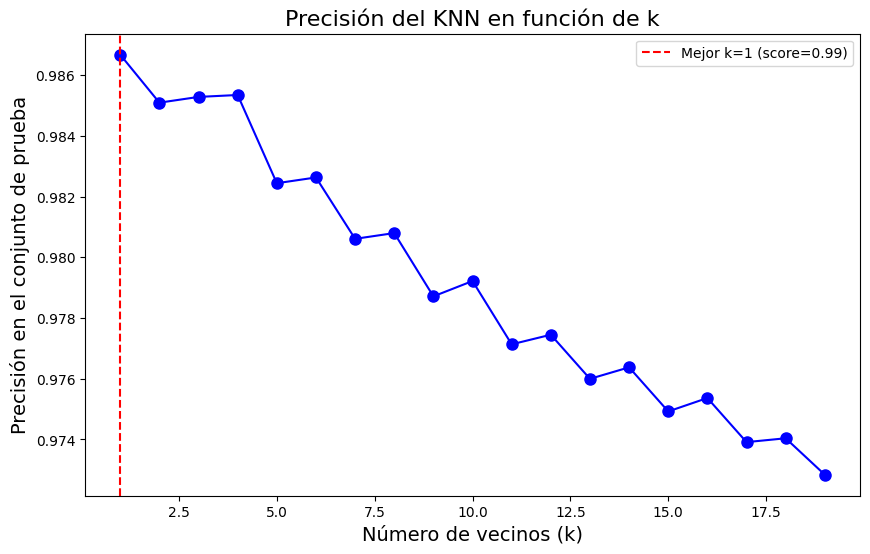

In [19]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Graficar los scores en función del valor de k
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='-', color='b', markersize=8)

# Agregar etiquetas y título
plt.xlabel('Número de vecinos (k)', fontsize=14)
plt.ylabel('Precisión en el conjunto de prueba', fontsize=14)
plt.title('Precisión del KNN en función de k', fontsize=16)

# Mostrar la mejor precisión en el gráfico
best_k = k_range[scores.index(max(scores))]
best_score = max(scores)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Mejor k={best_k} (score={best_score:.2f})')

# Agregar leyenda
plt.legend(loc='best')
plt.show()

El valor de K que nos brindó el mejor rendimiento inicialmente fue 1. Sin embargo, al usar =1 en KNN, el modelo tiende a sobrentrenarse, especialmente en la fase de entrenamiento. Para mitigar este problema, se probarán diferentes valores de k en el rango de 1 a 5, y se evaluarán los resultados utilizando la precisión (accuracy) tanto en el conjunto de entrenamiento como en el de prueba.

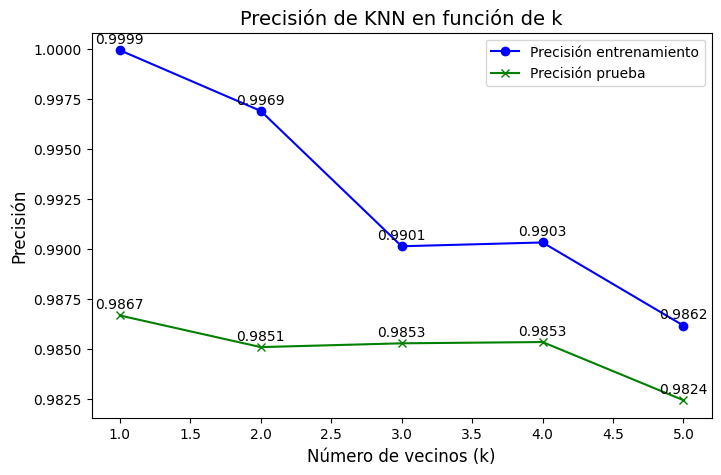

In [20]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Rango de valores para k (de 1 a 5)
k_range = range(1, 6)
scores_train = []
scores_test = []

# Probar diferentes valores de k
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    model_knn.fit(X_train, y_train)

    # Evaluar precisión en entrenamiento y prueba
    train_accuracy = model_knn.score(X_train, y_train)
    test_accuracy = model_knn.score(X_test, y_test)

    # Almacenar los resultados
    scores_train.append(train_accuracy)
    scores_test.append(test_accuracy)

    # Imprimir si hay sobreentrenamiento
    if train_accuracy > test_accuracy + 0.05:
        print(f'Sobreentrenamiento con k={k}: Entrenamiento={train_accuracy:.4f}, Prueba={test_accuracy:.4f}')

# Graficar las precisiones en función de k
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores_train, marker='o', color='b', label='Precisión entrenamiento')
plt.plot(k_range, scores_test, marker='x', color='g', label='Precisión prueba')

# Mostrar los valores en el gráfico
for i, txt in enumerate(scores_train):
    plt.annotate(f'{txt:.4f}', (k_range[i], scores_train[i]), textcoords="offset points", xytext=(0, 5), ha='center')
for i, txt in enumerate(scores_test):
    plt.annotate(f'{txt:.4f}', (k_range[i], scores_test[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Etiquetas y título
plt.xlabel('Número de vecinos (k)', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.title('Precisión de KNN en función de k', fontsize=14)

# Mostrar el mejor valor de k
plt.legend()
plt.show()

# Imprimir k, y sus respectivas precisiones de entrenamiento y prueba
for k, train_acc, test_acc in zip(k_range, scores_train, scores_test):
    print(f'k={k}: Precisión entrenamiento={train_acc:.4f}, Precisión prueba={test_acc:.4f}')


Con k = 1, hay sobre entrenamiento, ya que la precisión en el conjunto de entrenamiento es mucho más alta que en el conjunto de prueba. Al aumentar k a 3, la precisión se equilibra en ambos conjuntos (0.9901 en entrenamiento y 0.9853 en prueba), indicando que ya no hay sobreentrenamiento. Con valores de k mayores, la precisión de prueba disminuye ligeramente. Por lo tanto, se selecciona k = 3 como el valor óptimo para evitar el sobreentrenamiento y mantener un buen rendimiento general del modelo.

In [21]:
#Modificación del best_k
best_k = 3

k=1: Precisión entrenamiento=0.9999, Precisión prueba=0.9867
k=2: Precisión entrenamiento=0.9969, Precisión prueba=0.9851
k=3: Precisión entrenamiento=0.9901, Precisión prueba=0.9853
k=4: Precisión entrenamiento=0.9903, Precisión prueba=0.9853
k=5: Precisión entrenamiento=0.9862, Precisión prueba=0.9824


### 2. Decision Trees

### Mejores parámetros Decision Tree

El proposito de este bloque será buscar el mejor parametro para el modelo Decision Tree que luego será evaluado junto con otros modelos de clasificacion para comparar el rendimiento y seleccionar la opción más adecuada para el problema en cuestión.

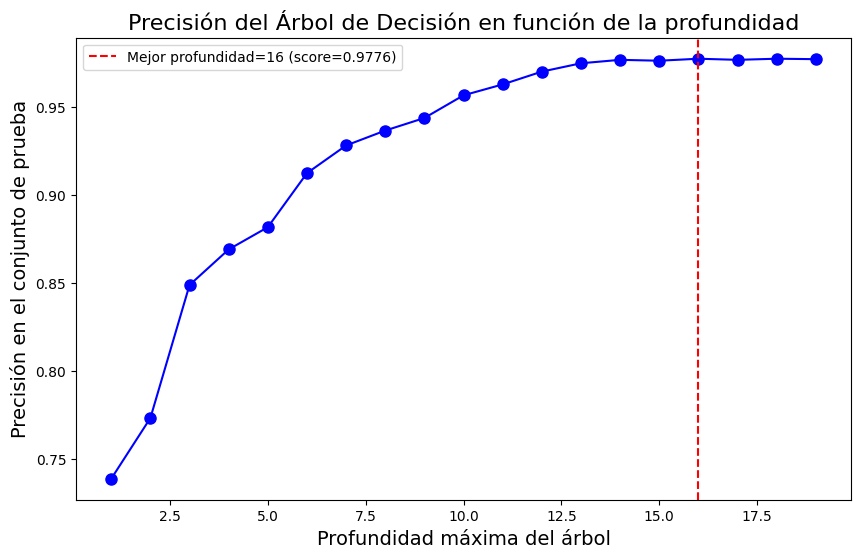

En este caso la mejor profundidad del árbol es: 16
Y la mejor precisión: 0.977577


In [22]:
#Rango de profundidad máxima para el árbol
max_depth_range = range(1, 20)
scores = []

# Probar diferentes profundidades
for depth in max_depth_range:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Graficar los scores en función de la profundidad
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, scores, marker='o', linestyle='-', color='b', markersize=8)

# Agregar etiquetas y título
plt.xlabel('Profundidad máxima del árbol', fontsize=14)
plt.ylabel('Precisión en el conjunto de prueba', fontsize=14)
plt.title('Precisión del Árbol de Decisión en función de la profundidad', fontsize=16)

# Mostrar la mejor precisión en el gráfico
best_depth = max_depth_range[scores.index(max(scores))]
best_score = max(scores)
plt.axvline(x=best_depth, color='r', linestyle='--', label=f'Mejor profundidad={best_depth} (score={best_score:.4f})')

# Agregar leyenda
plt.legend(loc='best')
plt.show()

# Mostrar la mejor profundidad y su precisión
print(f"En este caso la mejor profundidad del árbol es: {best_depth}")
print(f"Y la mejor precisión: {best_score:.6f}")

In [23]:
f"Estos resultados sugieren que el modelo está realizando una clasificación muy efectiva, con una precisión alta en sus predicciones. Con una tasa de precisión del {best_score:.6f}, el modelo está logrando predecir correctamente la mayoría de las observaciones, lo que indica que está aprendiendo adecuadamente las relaciones entre las características de los datos y las categorías a predecir."

'Estos resultados sugieren que el modelo está realizando una clasificación muy efectiva, con una precisión alta en sus predicciones. Con una tasa de precisión del 0.977577, el modelo está logrando predecir correctamente la mayoría de las observaciones, lo que indica que está aprendiendo adecuadamente las relaciones entre las características de los datos y las categorías a predecir.'

### 3. Random Forest

### Mejores parámetros Random Forest

La finalidad de este bloque será identificar el mejor parámetro para el modelo Random Forest, que posteriormente será evaluado junto con otros modelos de clasificación. Esto permitirá comparar su rendimiento y determinar cuál de ellos es el más adecuado para resolver el problema específico en cuestión.

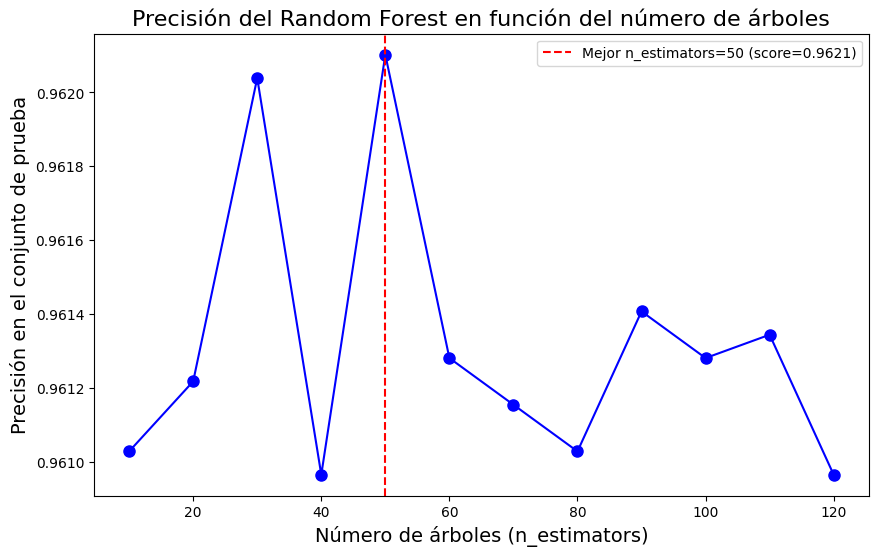

Mejor número de árboles: 50
Mejor precisión: 0.962102


In [24]:
# Rango de número de árboles en el bosque
n_estimators_range = range(10,125, 10)  # Desde 10 hasta 200, en incrementos de 10
scores = []

# Probar diferentes números de árboles
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=29, max_depth=9, criterion='entropy')
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Graficar los scores en función del número de árboles
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, scores, marker='o', linestyle='-', color='b', markersize=8)

# Agregar etiquetas y título
plt.xlabel('Número de árboles (n_estimators)', fontsize=14)
plt.ylabel('Precisión en el conjunto de prueba', fontsize=14)
plt.title('Precisión del Random Forest en función del número de árboles', fontsize=16)

# Mostrar la mejor precisión en el gráfico
best_n_r = n_estimators_range[scores.index(max(scores))]
best_score_r = max(scores)
plt.axvline(x=best_n_r, color='r', linestyle='--', label=f'Mejor n_estimators={best_n_r} (score={best_score_r:.4f})')

# Agregar leyenda
plt.legend(loc='best')
plt.show()

# Mostrar el mejor número de árboles y su precisión
print(f"Mejor número de árboles: {best_n_r}")
print(f"Mejor precisión: {best_score_r:.6f}")

In [25]:
f"El modelo alcanzó su mejor rendimiento con {best_n_r} árboles, logrando una precisión de {best_score_r:.6f}. Esto indica que el modelo realizó una clasificación bastante precisa, prediciendo correctamente la mayoría de los casos en el conjunto de prueba"

'El modelo alcanzó su mejor rendimiento con 50 árboles, logrando una precisión de 0.962102. Esto indica que el modelo realizó una clasificación bastante precisa, prediciendo correctamente la mayoría de los casos en el conjunto de prueba'

### 4. Logistic Regresion

### Mejores parámetros Logistic Regresion

El fin de este bloque será encontrar el mejor parámetro para el modelo Logístic Regresion, que luego será evaluado junto con otros modelos de clasificación. Esto permitirá comparar su desempeño y seleccionar el modelo más adecuado para abordar el problema en cuestión.

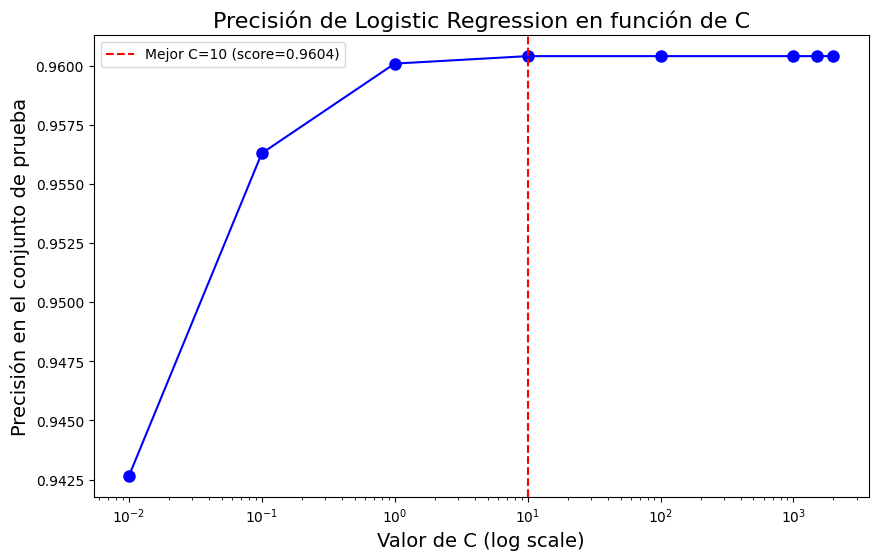

Mejor valor de C: 10
Mejor precisión: 0.960397


In [26]:
# Rango de valores de C
c_values = [0.01, 0.1, 1, 10, 100, 1000, 1500, 2000]
scores = []

# Probar diferentes valores de C
for c in c_values:
    logreg = LogisticRegression(C=c, random_state=42)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Graficar los scores en función del valor de C
plt.figure(figsize=(10, 6))
plt.plot(c_values, scores, marker='o', linestyle='-', color='b', markersize=8)

# Escala logarítmica para los valores de C
plt.xscale('log')

# Agregar etiquetas y título
plt.xlabel('Valor de C (log scale)', fontsize=14)
plt.ylabel('Precisión en el conjunto de prueba', fontsize=14)
plt.title('Precisión de Logistic Regression en función de C', fontsize=16)

# Mostrar la mejor precisión en el gráfico
best_c = c_values[scores.index(max(scores))]
best_score_l = max(scores)
plt.axvline(x=best_c, color='r', linestyle='--', label=f'Mejor C={best_c} (score={best_score_l:.4f})')

# Agregar leyenda
plt.legend(loc='best')
plt.show()

# Mostrar el mejor valor de C y su precisión
print(f"Mejor valor de C: {best_c}")
print(f"Mejor precisión: {best_score_l:.6f}")

In [27]:
f'El modelo alcanzó su mejor rendimiento con un valor de C de {best_c} y una precisión de {best_score_l:.6f}.'

'El modelo alcanzó su mejor rendimiento con un valor de C de 10 y una precisión de 0.960397.'

# Entrenamiento de los modelos

Una vez identificados los mejores hiperparámetros para los modelos seleccionados, el siguiente paso es entrenarlos utilizando los parámetros óptimos obtenidos. Con los modelos entrenados, los compararemos entre sí en función de su rendimiento sobre los datos de prueba. Esta comparación nos permitirá determinar cuál de los modelos ofrece el mejor desempeño para el problema que estamos resolviendo, asegurando así que seleccionamos la opción más adecuada para obtener resultados precisos y confiables.

Definición de los hiperparámetros para los modelos: en este bloque se establecen los hiperparámetros previamente seleccionados para cada uno de los modelos.

In [28]:
# Diccionario para guardar los modelos entrenados
models_a = {
    'KNN' : KNeighborsClassifier(n_neighbors=best_k, weights='uniform'),
    'Decision Tree Classifier': DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=29),
    'Random Forest': RandomForestClassifier(criterion='entropy', max_depth=best_depth, n_estimators= best_n_r, random_state=29),
    'Logistic Regression': LogisticRegression(C=best_c)
}

print(f"Mejor valor de k: {best_k}")
print(f"Mejor profundidad del árbol: {best_depth}")
print(f"Mejor número de estimadores: {best_n_r}")
print(f"Mejor valor de C: {best_c}")

Mejor valor de k: 3
Mejor profundidad del árbol: 16
Mejor número de estimadores: 50
Mejor valor de C: 10


En el modelo KNN se utiliza un peso uniforme debido al desbalanceo de clases, lo que ayuda a equilibrar la predicción entre las clases. El número de vecinos se ajusta para evitar el sobreentrenamiento. En el Árbol de Decisión, la profundidad fue establecida en las secciones anteriores, y se usa el criterio de entropía, adecuado para problemas con clases desbalanceadas. Random Forest sigue el mismo enfoque, ajustando la profundidad máxima y el número de estimadores según lo establecido previamente. Finalmente, la Regresión Logística se optimiza ajustando el valor de C para regularizar el modelo y evitar el sobreajuste.

La separación de los datos para entrenamiento y prueba se realiza con los datos ya escalados y cuya dimensionalidad ha sido reducida mediante PCA. Esto garantiza que los modelos se entrenen con datos optimizados y preparados para obtener resultados más eficientes.

In [29]:
X_alt = pd.DataFrame(X_pca)
y_alt = data['Survived']
# Separa la data en entrenamiento y prueba
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_alt, y_alt, test_size=0.2,
            random_state = 29, stratify=y_alt, shuffle=True )

## Entrenamiento de los modelos

En el siguiente bloque se ejecuta el entrwenamiento de los modelos, la logica de sto esta definia en las funciones qyue estan al comiendo del notebook

In [30]:
# Genetación de los modelos
matrices, history_a, history_roc_a, history_report_a = generacion_modelos(models_a, target_names,
                                                                    X_train_a, X_test_a,
                                                                    y_train_a, y_test_a)

# Fase 5 - Evaluación


En esta primera parte de la evaluación, se presentarán los resultados de todos los modelos.

### Matriz de confusión

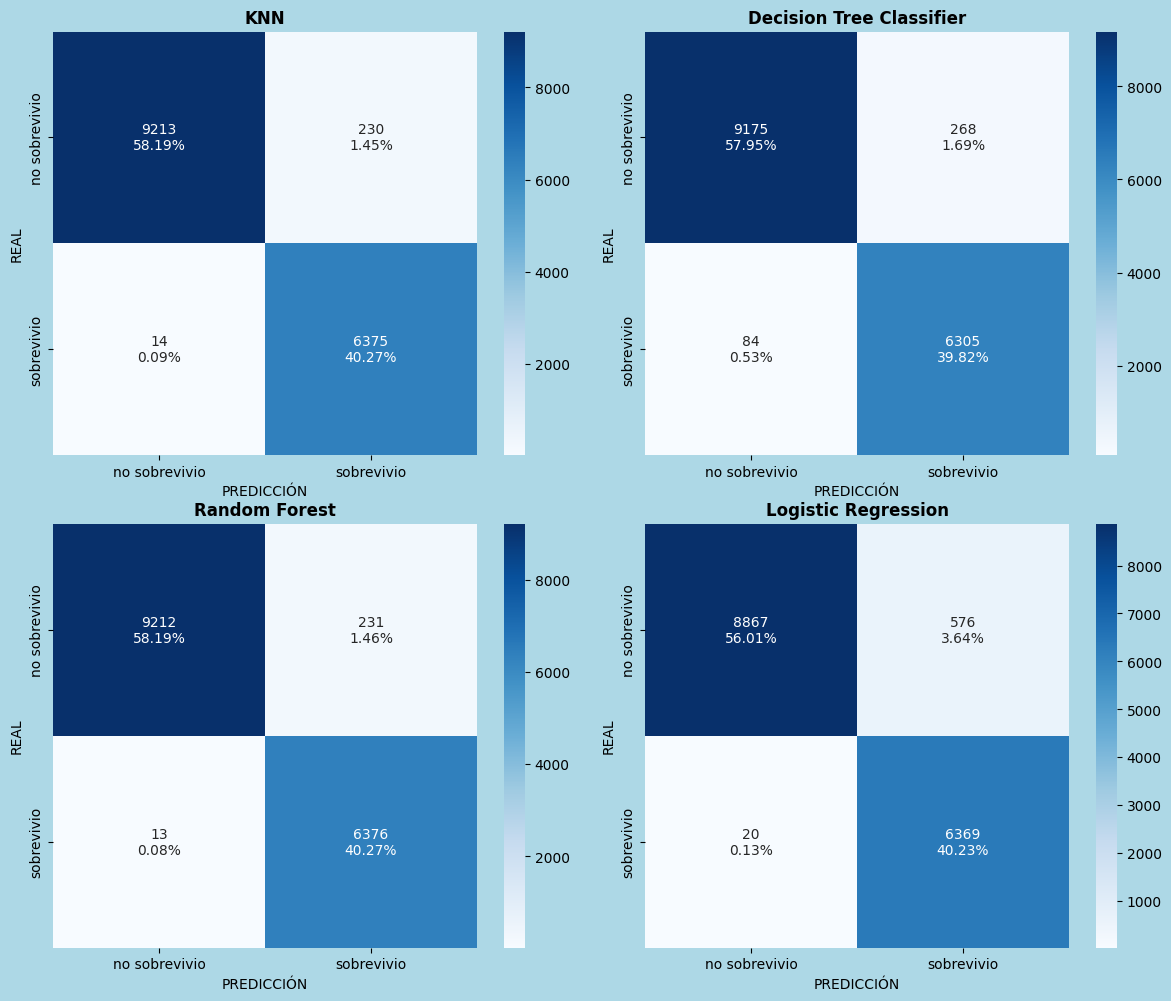

In [31]:
# Crear un gráfico con 2 subgráficos por fila y 2 filas en total para 4 matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10), facecolor='lightblue')

# Iterar sobre los modelos y sus matrices
for ax, (nombre_modelo, matriz) in zip(axes.flat, matrices.items()):
    # Graficar la matriz de confusión en el subplot correspondiente
    # Aquí no pasamos 'cmap' a la función ver_matriz() si no lo acepta
    ver_matriz(matriz, target_names, ax, title=nombre_modelo)

    # Si quieres cambiar el color manualmente para las matrices, puedes hacer algo como esto
    ax.imshow(matriz, cmap='Blues')  # Cambiar a un color 'Blues', por ejemplo

# Ajustar el layout de los subgráficos para que no se solapen
plt.tight_layout()
plt.show()

En general, los modelos muestran un buen rendimiento al clasificar correctamente la mayoría de las instancias, pero se observan más errores en la clase positiva (sobrevivió) debido al desbalance de clases. Esto se refleja en la mayor cantidad de falsos positivos y falsos negativos en comparación con la clase negativa (no sobrevivió), especialmente en modelos como Logistic Regression, que presenta el mayor número de falsos positivos, y Decision Tree, que tiene más falsos negativos. Sin embargo, modelos como KNN y Random Forest logran un mejor equilibrio en la clasificación, reduciendo los errores en ambas clases

### Reportes de clasificación

In [32]:
all_precision = {}
all_recall = {}
all_f1 = {}
all_auc = {}

# Suponiendo que 'matrices', 'history_roc', etc., ya han sido generados por la función generacion_modelos
for modelo, matriz in matrices.items():
    # Recupera las métricas desde la matriz de confusión
    accuracy_manual, precision_manual, recall_manual, f1_score_manual = metrics_by_matrix(matriz)

    # Recupera el AUC desde history_roc
    roc_auc = history_roc_a[modelo]

    # Imprimir métricas
    print(f"\n** Métricas desde la matriz de confusión de {modelo} **")
    print("\t{0:<15} = {1:.4f}".format("Accuracy", accuracy_manual))
    print("\t{0:<15} = {1:.4f}".format("Precision", precision_manual))
    print("\t{0:<15} = {1:.4f}".format("AUC", roc_auc))
    print("\t{0:<15} = {1:.4f}".format("F1-score", f1_score_manual))
    print("\t{0:<15} = {1:.4f}".format("Recall", recall_manual))

    # Guardar en los diccionarios si es necesario
    all_precision[modelo] = precision_manual
    all_recall[modelo] = recall_manual
    all_f1[modelo] = f1_score_manual
    all_auc[modelo] = roc_auc


** Métricas desde la matriz de confusión de KNN **
	Accuracy        = 0.9846
	Precision       = 0.9652
	AUC             = 0.9867
	F1-score        = 0.9812
	Recall          = 0.9978

** Métricas desde la matriz de confusión de Decision Tree Classifier **
	Accuracy        = 0.9778
	Precision       = 0.9592
	AUC             = 0.9792
	F1-score        = 0.9728
	Recall          = 0.9869

** Métricas desde la matriz de confusión de Random Forest **
	Accuracy        = 0.9846
	Precision       = 0.9650
	AUC             = 0.9868
	F1-score        = 0.9812
	Recall          = 0.9980

** Métricas desde la matriz de confusión de Logistic Regression **
	Accuracy        = 0.9624
	Precision       = 0.9171
	AUC             = 0.9679
	F1-score        = 0.9553
	Recall          = 0.9969


En general, todos los modelos muestran un buen desempeño en la clasificación, con métricas como precisión, recall, F1-score, accuracy y AUC que indican un aprendizaje adecuado de los datos. El modelo KNN tiene ligeramente mejores resultados, especialmente en AUC, mientras que Random Forest y Decision Tree también presentan un buen rendimiento. Logistic Regression, aunque un poco más bajo en precisión, sigue siendo competitivo. En resumen, los modelos han aprendido bien y ofrecen resultados sólidos para la clasificación.

## Selección mejor modelo

### Metrica utilizada

A continuación, se procederá a determinar el mejor modelo en función del F1-score, dado que en este contexto existe un desbalance de clases: el 59.6% de los casos corresponden a personas que no sobreviven (47,214), mientras que el 40.4% restante (31,943) corresponde a personas que sobreviven. En escenarios con clases desbalanceadas, el F1-score resulta ser una métrica más adecuada, ya que toma en cuenta tanto la precisión como el recall, evitando que los modelos se favorezcan injustamente hacia la clase mayoritaria. El modelo que obtenga el mayor valor de F1-score será considerado el más adecuado para esta tarea.

### Obtención del mejor modelo

La siguiente función get_bestModel recibe dos cosas: un registro de los puntajes de los modelos y una lista con los modelos. La función busca el modelo con el puntaje más alto y luego devuelve el nombre de ese modelo, su puntaje y el modelo en sí.

In [33]:
def get_bestModel(history : dict, models : dict):
  """ Retorna el mejor modelo y el mejor score considerando el history entregado """
  name_best_model, best_score = max(history.items(), key=itemgetter(1))
  best_model = models[name_best_model]
  return name_best_model, best_score, best_model

Visualización de los F1 score de todos los modelos

In [34]:
# Visualiza como una tabla
pd.DataFrame.from_dict(all_f1, orient='index', columns=['F1 score'])

,F1 score
KNN,0.981222
Decision Tree Classifier,0.972844
Random Forest,0.981225
Logistic Regression,0.955302


Selección del mejor modelo utilizando la función previamente definida.

In [35]:
name_best_model, best_score, best_model = get_bestModel(all_f1, models_a)
print(f"Considerando 'F1 score' el mejor modelo es '{name_best_model}' con un score de {best_score:.4f}")
print("-"*80)
print(best_model)


Considerando 'F1 score' el mejor modelo es 'Random Forest' con un score de 0.9812
--------------------------------------------------------------------------------
RandomForestClassifier(criterion='entropy', max_depth=16, n_estimators=50,
                       random_state=29)


## Analisis mejor modelo

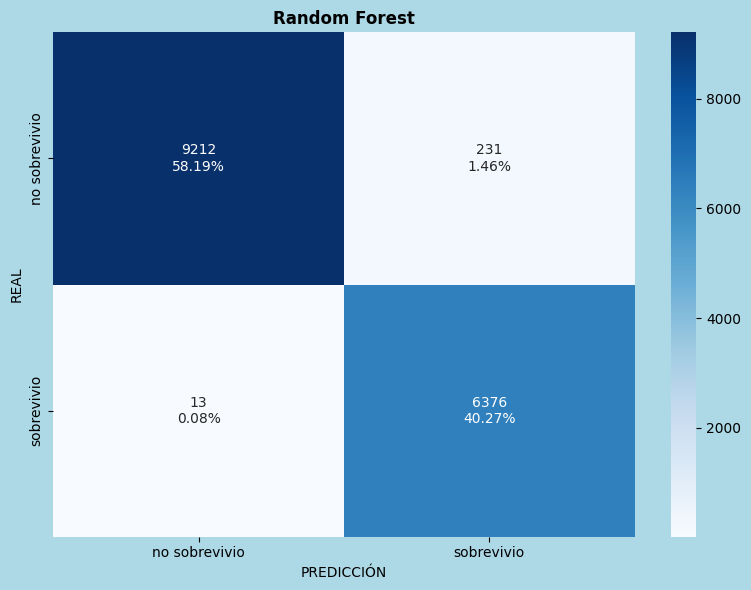

In [36]:
# Acceder a la matriz de confusión del mejor modelo automáticamente
matriz_mejor_modelo = matrices[name_best_model]

# Ahora puedes usar 'matriz_mejor_modelo' para dibujarla
fig, ax = plt.subplots(figsize=(8, 6), facecolor='lightblue')

# Dibujar la matriz de confusión del mejor modelo
ver_matriz(matriz_mejor_modelo, target_names, ax, title=name_best_model)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

La matriz de confusión muestra los siguientes resultados

In [37]:
matriz_mejor_modelo = matrices[name_best_model]

# Obtener los valores de la matriz de confusión
tn, fp, fn, tp = matriz_mejor_modelo.ravel()

# Calcular el total de casos
total = tn + fp + fn + tp

# Calcular los porcentajes
tn_percentage = (tn / total) * 100
fp_percentage = (fp / total) * 100
fn_percentage = (fn / total) * 100
tp_percentage = (tp / total) * 100

# Imprimir la interpretación de los valores con porcentajes
print(f"Resultados del modelo '{name_best_model}':\n")
print(f"{tn} jugadores no sobrevivieron y fueron correctamente clasificados como tal (Verdaderos Negativos) ({tn_percentage:.2f}%).")
print(f"{fp} jugadores no sobrevivieron, pero fueron incorrectamente clasificados como sobrevivientes (Falsos Positivos) ({fp_percentage:.2f}%).")
print(f"{tp} jugadores sobrevivieron y fueron correctamente clasificados como tal (Verdaderos Positivos) ({tp_percentage:.2f}%).")
print(f"{fn} jugadores sobrevivieron, pero fueron incorrectamente clasificados como no sobrevivientes (Falsos Negativos) ({fn_percentage:.2f}%).")

Resultados del modelo 'Random Forest':

9212 jugadores no sobrevivieron y fueron correctamente clasificados como tal (Verdaderos Negativos) (58.19%).
231 jugadores no sobrevivieron, pero fueron incorrectamente clasificados como sobrevivientes (Falsos Positivos) (1.46%).
6376 jugadores sobrevivieron y fueron correctamente clasificados como tal (Verdaderos Positivos) (40.27%).
13 jugadores sobrevivieron, pero fueron incorrectamente clasificados como no sobrevivientes (Falsos Negativos) (0.08%).


Esto indica que el modelo tiene una alta precisión, con pocos errores tanto en predecir supervivencias como eliminaciones. El modelo clasifica correctamente la mayoría de los jugadores en ambas categorías (sobrevivido/no sobrevivido), pero prediciendo mejor a los no sobrevivientes por el desbalance de clases mencionado anteriormente.

In [38]:
# Recupera la matriz de confusión y las métricas del mejor modelo automáticamente
modelo_especifico = name_best_model  # Nombre del mejor modelo
matriz = matrices[modelo_especifico]

accuracy_manual, precision_manual, recall_manual, f1_score_manual = metrics_by_matrix(matriz)
roc_auc = history_roc_a[modelo_especifico]

# Imprimir métricas del modelo específico
print(f"\n** Métricas desde la matriz de confusión de {modelo_especifico} **")
print("\t{0:<15} = {1:.4f}".format("Precision", precision_manual))
print("\t{0:<15} = {1:.4f}".format("Recall", recall_manual))
print("\t{0:<15} = {1:.4f}".format("F1-score", f1_score_manual))
print("\t{0:<15} = {1:.4f}".format("Accuracy", accuracy_manual))
print("\t{0:<15} = {1:.4f}".format("ROC_AUC", roc_auc))

# Generar interpretaciones automáticamente
print(f"\n** Interpretaciones de métricas de {modelo_especifico} **")
print(f"\tEl modelo ha identificado correctamente al {recall_manual * 100:.2f}% de jugadores que realmente sobrevivieron en las partidas (Recall).")
print(f"\tHa identificado con un {precision_manual * 100:.2f}% de precisión a los jugadores que sobrevivieron y que realmente lo hicieron (Precision).")
print(f"\tPredice correctamente si un jugador sobrevivió o no en el {accuracy_manual * 100:.2f}% de los casos, reflejando su efectividad general (Accuracy).")
print(f"\tEl modelo mantiene un balance adecuado entre precisión y sensibilidad, con un F1-score de {f1_score_manual * 100:.2f}% (F1-score).")
print(f"\tCon un AUC de {roc_auc * 100:.2f}%, el modelo demuestra el desempeño para diferenciar entre las dos clases (ROC_AUC).")

# Generar la recomendación automáticamente
recomendacion = (
    f"Dado que el modelo {name_best_model} ha mostrado el mejor rendimiento, "
    f"es el más adecuado para el objetivo planteado. "
    f"Este modelo sobresale en métricas clave como Accuracy ({accuracy_manual * 100:.2f}%), "
    f"Precision ({precision_manual * 100:.2f}%) y F1-Score ({f1_score_manual * 100:.2f}%).\n\n"
    f"Es importante destacar que la distribución de nuestra variable objetivo "
    f"presenta un sesgo debido al desbalance de clases. Para evitar que este desequilibrio "
    f"afecte negativamente el rendimiento del modelo, sería recomendable aplicar técnicas de balanceo "
    f"de clases, lo que permitiría mejorar la precisión de las predicciones sin comprometer la efectividad."
)



** Métricas desde la matriz de confusión de Random Forest **
	Precision       = 0.9650
	Recall          = 0.9980
	F1-score        = 0.9812
	Accuracy        = 0.9846
	ROC_AUC         = 0.9868

** Interpretaciones de métricas de Random Forest **
	El modelo ha identificado correctamente al 99.80% de jugadores que realmente sobrevivieron en las partidas (Recall).
	Ha identificado con un 96.50% de precisión a los jugadores que sobrevivieron y que realmente lo hicieron (Precision).
	Predice correctamente si un jugador sobrevivió o no en el 98.46% de los casos, reflejando su efectividad general (Accuracy).
	El modelo mantiene un balance adecuado entre precisión y sensibilidad, con un F1-score de 98.12% (F1-score).
	Con un AUC de 98.68%, el modelo demuestra el desempeño para diferenciar entre las dos clases (ROC_AUC).


# Fase 6 - Deployment

In [39]:
# Suponiendo que best_model es el mejor modelo entrenado que obtuviste previamente
# Y pca es el PCA que has utilizado para transformar los datos

# Crear el diccionario que contiene el modelo y el PCA
model_with_pca = {
    'model': best_model,  # Este es el mejor modelo que has entrenado
    'pca': pca  # Guardamos el PCA que has utilizado para transformar los datos
}

# Guardar tanto el modelo como el PCA en un archivo
filename = 'best_model_with_pca.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model_with_pca, file)
    print(f"Modelo y PCA guardados como {filename}")

Modelo y PCA guardados como best_model_with_pca.pkl


In [40]:

# Crear un conjunto de datos de prueba con características aleatorias
np.random.seed(42)  # Fijamos la semilla para reproducibilidad

# Crear datos de prueba (en este caso, 50 muestras con 4 características)
n_samples = 50
n_features = 4
X_test = np.random.rand(n_samples, n_features)  # Datos aleatorios

# Convertir a un DataFrame para tener etiquetas de columna
columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4']
X_test_df = pd.DataFrame(X_test, columns=columns)

# Convertir el DataFrame en formato JSON
test_data_json = X_test_df.to_json(orient='records')

# Guardar los datos de prueba en un archivo JSON
json_filename = 'test_data.json'
with open(json_filename, 'w') as f:
    f.write(test_data_json)

print(f"Datos de prueba guardados en {json_filename}")

Datos de prueba guardados en test_data.json


Comprobacion del archivo

In [41]:
# Cargar el archivo con el modelo y el PCA
filename = 'best_model_with_pca.pkl'

with open(filename, 'rb') as file:
    model_with_pca = pickle.load(file)

# Extraer el modelo y el PCA del diccionario cargado
best_model_loaded = model_with_pca['model']
pca_loaded = model_with_pca['pca']

# Verificar que todo está correcto
print(f"Modelo cargado: {best_model_loaded}")
print(f"PCA cargado: {pca_loaded}")

Modelo cargado: RandomForestClassifier(criterion='entropy', max_depth=16, n_estimators=50,
                       random_state=29)
PCA cargado: PCA(n_components=4)


In [42]:
# Verificar el número de características con las que fue entrenado el PCA
print(f"Componentes del PCA: {pca_loaded.n_components_}")

# Verificar el número de características del modelo de RandomForest
n_features_model = best_model_loaded.n_features_in_
print(f"Número de características en el modelo: {n_features_model}")

Componentes del PCA: 4
Número de características en el modelo: 4


# Pregunta final

¿Qué modelo recomendaría utilizar para cumplir con el objetivo propuesto al inicio? Deberá justificar su respuesta usando los resultados obtenidos


In [43]:
print("\n** Respuesta **")
print(recomendacion)


** Respuesta **
Dado que el modelo Random Forest ha mostrado el mejor rendimiento, es el más adecuado para el objetivo planteado. Este modelo sobresale en métricas clave como Accuracy (98.46%), Precision (96.50%) y F1-Score (98.12%).

Es importante destacar que la distribución de nuestra variable objetivo presenta un sesgo debido al desbalance de clases. Para evitar que este desequilibrio afecte negativamente el rendimiento del modelo, sería recomendable aplicar técnicas de balanceo de clases, lo que permitiría mejorar la precisión de las predicciones sin comprometer la efectividad.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d0cd5f5-8ca7-4952-a2aa-2ccbfa3df0f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>